# Fitting Lognormal PDFs: 2 Modes

This notebook demonstrates how to use a neural network to obtain an initial guess for fitting a lognormal probability density function (PDF) with two modes. It also shows how to optimize the initial guess using a cost function and visualize the results.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from particula.next.particles.properties import lognormal_pdf_distribution
from particula.data.process.ml_analysis import generate_and_train_2mode_sizer

## Generate Simulated Data

We start by generating simulated lognormal data for two modes. The data includes some noise to simulate real-world conditions.

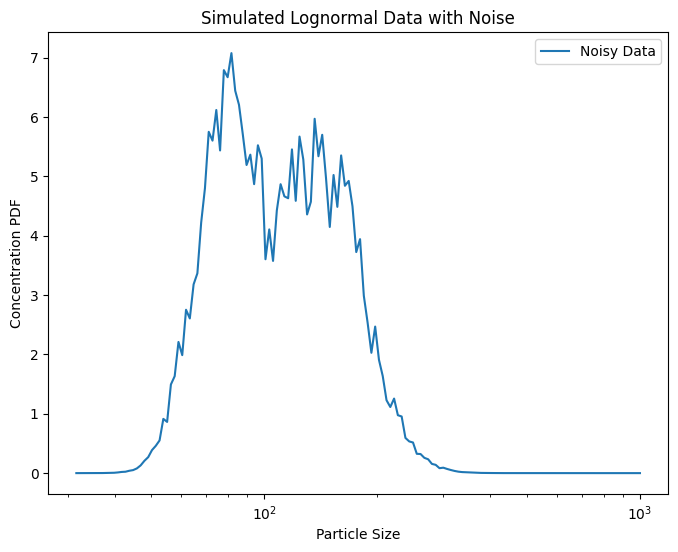

In [11]:
# Generate x-values (particle sizes)
x_values = np.logspace(1.5, 3, 150)

# Generate lognormal PDF with noise
concentration_pdf = lognormal_pdf_distribution(
    x_values=x_values,
    mode=np.array([80, 150]),
    geometric_standard_deviation=np.array([1.2, 1.3]),
    number_of_particles=np.array([200, 500]),
)

# Introduce noise to the data
concentration_pdf = concentration_pdf * np.random.uniform(
    low=0.8, high=1.2, size=concentration_pdf.shape
)

# Plot the noisy data
plt.figure(figsize=(8, 6))
plt.plot(x_values, concentration_pdf, label="Noisy Data")
plt.xscale("log")
plt.xlabel("Particle Size")
plt.ylabel("Concentration PDF")
plt.title("Simulated Lognormal Data with Noise")
plt.legend()
plt.show()

## Guess Using Neural Network

Next, we use a pre-trained neural network model to get an initial guess for the lognormal parameters (mode, geometric standard deviation, and number of particles).


In [12]:
# Get initial guess from the ML model
(
    mode_values_guess,
    geometric_standard_deviation_guess,
    number_of_particles_guess,
) = generate_and_train_2mode_sizer.lognormal_2mode_ml_guess(
    logspace_x=x_values,
    concentration_pdf=concentration_pdf,
)

# Display the initial guess results
print("Initial Guess:")
print(f"Mode: {mode_values_guess}")
print(f"GSD: {geometric_standard_deviation_guess}")
print(f"Number of particles: {number_of_particles_guess}")

Initial Guess:
Mode: [ 92.25874499 145.67263772]
GSD: [1.45593575 1.74247836]
Number of particles: [116.80000476 610.07015103]


## Optimize the Lognormal Fit

With the initial guess obtained, we now optimize the parameters using a cost function to minimize the difference between the actual data and the fitted lognormal distribution.


In [ ]:
(
    mode_values_optimized,
    gsd_optimized,
    number_of_particles_optimized,
    r2_optimized,
    optimization_results,
) = generate_and_train_2mode_sizer.optimize_lognormal_2mode(
    mode_guess=mode_values_guess,
    geometric_standard_deviation_guess=geometric_standard_deviation_guess,
    number_of_particles_in_mode_guess=number_of_particles_guess,
    x_values=x_values,
    concentration_pdf=concentration_pdf,
)

In [5]:
# Display the optimized results
print("Optimized Fit:")
print(f"Optimized mode values: {mode_values_optimized}")
print(f"Optimized GSD: {gsd_optimized}")
print(f"Optimized number of particles: {number_of_particles_optimized}")
print(f"Optimized R²: {r2_optimized}")
print(f"Best optimization method: {optimization_results['best_method']}")

Optimized Fit:
Optimized mode values: [ 79.00939809 148.12029442]
Optimized GSD: [1.19317136 1.31798246]
Optimized number of particles: [185.04170135 489.44764192]
Optimized R²: 0.9764378390248285
Best optimization method: Powell


## Visualization

Finally, we compare the original data, the initial guess from the neural network, and the optimized fit. This step helps us understand how close the initial guess was and how much improvement was achieved through optimization.


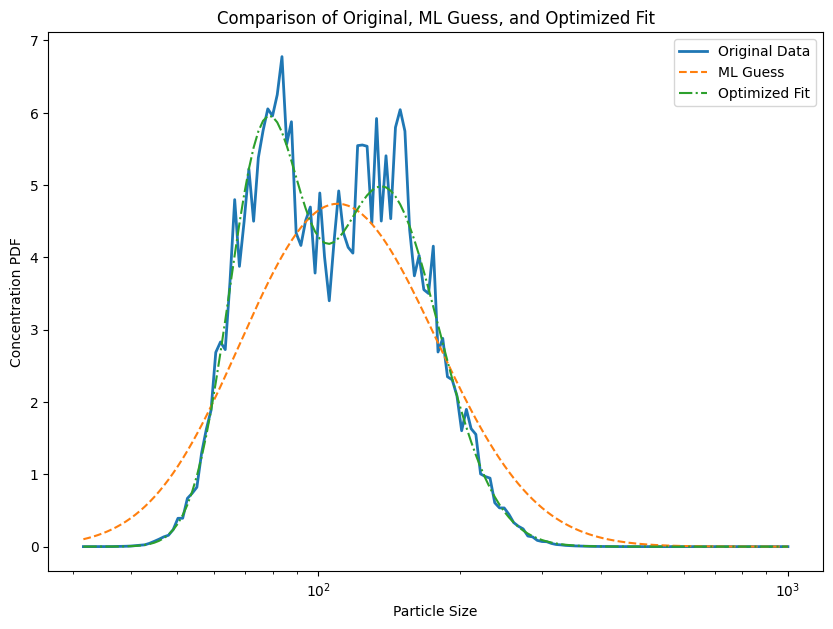

In [6]:


# Generate concentration PDFs for guess and optimized values
concentration_pdf_guess = lognormal_pdf_distribution(
    x_values=x_values,
    mode=mode_values_guess,
    geometric_standard_deviation=geometric_standard_deviation_guess,
    number_of_particles=number_of_particles_guess,
)

concentration_pdf_optimized = lognormal_pdf_distribution(
    x_values=x_values,
    mode=mode_values_optimized,
    geometric_standard_deviation=gsd_optimized,
    number_of_particles=number_of_particles_optimized,
)

# Plot the original, guess, and optimized PDFs
plt.figure(figsize=(10, 7))
plt.plot(x_values, concentration_pdf, label="Original Data", linewidth=2)
plt.plot(x_values, concentration_pdf_guess, label="ML Guess", linestyle="--")
plt.plot(
    x_values,
    concentration_pdf_optimized,
    label="Optimized Fit",
    linestyle="-.",
)
plt.xscale("log")
plt.xlabel("Particle Size")
plt.ylabel("Concentration PDF")
plt.title("Comparison of Original, ML Guess, and Optimized Fit")
plt.legend()
plt.show()

## Additional Fits

Let's try different initial conditions to see how the optimization behaves with varying data sets. 

In [ ]:

# Example
x_values_example1 = np.logspace(1.2, 4, 150)
concentration_pdf_example1 = lognormal_pdf_distribution(
    x_values=x_values_example1,
    mode=np.array([100, 800]),
    geometric_standard_deviation=np.array([1.1, 1.1]),
    number_of_particles=np.array([300, 800]),
)

# Add noise
concentration_pdf_example1 = concentration_pdf_example1 * np.random.uniform(
    low=0.8, high=1.25, size=concentration_pdf_example1.shape
)

# Obtain initial guess
mode_guess1, gsd_guess1, particles_guess1 = (
    generate_and_train_2mode_sizer.lognormal_2mode_ml_guess(
        logspace_x=x_values_example1,
        concentration_pdf=concentration_pdf_example1,
    )
)

# Optimize
mode_opt1, gsd_opt1, particles_opt1, r2_opt1, results1 = (
    generate_and_train_2mode_sizer.optimize_lognormal_2mode(
        mode_guess=mode_guess1,
        geometric_standard_deviation_guess=gsd_guess1,
        number_of_particles_in_mode_guess=particles_guess1,
        x_values=x_values_example1,
        concentration_pdf=concentration_pdf_example1,
    )
)

Example 1:
Initial Guess:
Mode: [144.29348909 814.7428809 ]
GSD: [1.22421034 1.08187183]
Number of particles: [337.38413373 823.46063666]
Optimized mode values: [ 99.33096138 803.28073419]
Optimized GSD: [1.10299172 1.10030301]
Optimized number of particles: [317.82509794 867.91570182]
Optimized R²: 0.9880507440291804


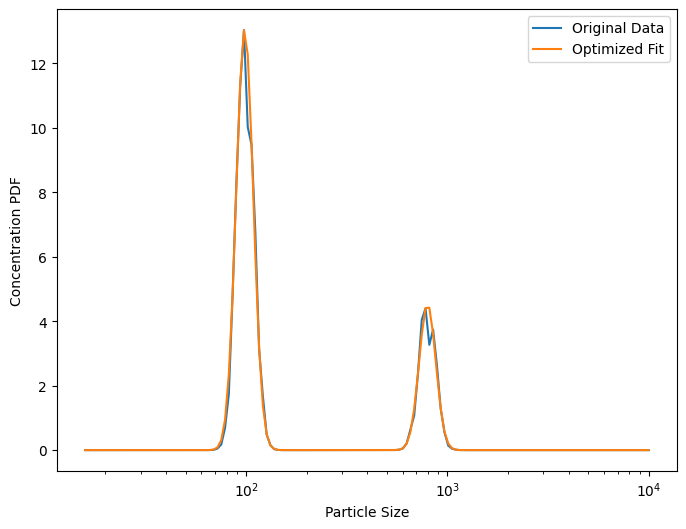

In [8]:
# Display and plot
print("Example 1:")
print(f"Initial Guess:")
print(f"Mode: {mode_guess1}")
print(f"GSD: {gsd_guess1}")
print(f"Number of particles: {particles_guess1}")

print(f"Optimized mode values: {mode_opt1}")
print(f"Optimized GSD: {gsd_opt1}")
print(f"Optimized number of particles: {particles_opt1}")
print(f"Optimized R²: {r2_opt1}")
plt.figure(figsize=(8, 6))
plt.plot(x_values_example1, concentration_pdf_example1, label="Original Data")
plt.plot(
    x_values_example1,
    lognormal_pdf_distribution(
        x_values=x_values_example1,
        mode=mode_opt1,
        geometric_standard_deviation=gsd_opt1,
        number_of_particles=particles_opt1,
    ),
    label="Optimized Fit",
)
plt.xscale("log")
plt.xlabel("Particle Size")
plt.ylabel("Concentration PDF")
plt.legend()
plt.show()

## Conclusion

This notebook demonstrated the use of a neural network for generating an initial guess for fitting a lognormal PDF with two modes. The initial guess was then optimized to improve the fit, and the results were visualized to compare the original data, the initial guess, and the optimized fit.